In [1]:
import sys
sys.path.append('..')  # 添加上级目录到搜索路径
from utils import *
from sklearn.metrics import mean_absolute_error

In [2]:
def calculate_rt_it_mae_metrics(N, M, m, q, net_type, samples=1):
    """
    计算ER和BA网络在SIR模型下的rt和it曲线
    """
    Rt = np.zeros((len(q), 51))
    It = np.zeros((len(q), 51))
    
    for _ in range(samples):
        # 如果G已经是输入参数，则不需要重新生成图
        if net_type == 'ER':
            G = nx.gnm_random_graph(N, M)
        elif net_type == 'BA':
            G = nx.barabasi_albert_graph(N, m)
        
        DC_plus = cal_DC_plus(G)
        sequence_DC_plus = dict(sorted(DC_plus.items(), key=lambda x: x[1], reverse=False))

        # 对于ER随机网络，子图的平均度比原始网络小，因此不做剪枝处理。
        Fr, Fi = cal_SIR_rt_it_vs_q(G, sequence_DC_plus, N, q)

        Rt += np.array(Fr).reshape(len(q), 51)
        It += np.array(Fi).reshape(len(q), 51)

    # 计算R值的MAE
    R_MAE_01 = mean_absolute_error(Rt[0, :]/samples, Rt[1, :]/samples)
    R_MAE_02 = mean_absolute_error(Rt[0, :]/samples, Rt[2, :]/samples)
    R_MAE_03 = mean_absolute_error(Rt[0, :]/samples, Rt[3, :]/samples)
    R_MAE_list = [R_MAE_01, R_MAE_02, R_MAE_03]
    
    # 计算I值的MAE
    I_MAE_01 = mean_absolute_error(It[0, :]/samples, It[1, :]/samples)
    I_MAE_02 = mean_absolute_error(It[0, :]/samples, It[2, :]/samples)
    I_MAE_03 = mean_absolute_error(It[0, :]/samples, It[3, :]/samples)
    I_MAE_list = [I_MAE_01, I_MAE_02, I_MAE_03]
    
    return Rt/samples, It/samples, R_MAE_list, I_MAE_list

In [3]:
# 设定移除节点比例
l = 4
q = [1- 1./2**i for i in range(l)]
print(q)

tmin, tmax = 0.0, 6.0
t = np.linspace(tmin, tmax, 51)

x = np.arange(l-1)  # 创建数值索引
labels = ['$l=1$', '$l=2$', '$l=3$']

[0.0, 0.5, 0.75, 0.875]


#### ER and BA network

In [4]:
N = 5000
M = 5*N
m = 5

In [5]:
rt_ER, it_ER, R_MAE_list_ER, I_MAE_list_ER = calculate_rt_it_mae_metrics(N, M, m, q, 'ER', samples=10)

subnetwork: 10.0 5000
subnetwork: 8.2512 2500
subnetwork: 5.8064 1250
subnetwork: 3.8656 625
subnetwork: 10.0 5000
subnetwork: 8.3408 2500
subnetwork: 5.8992 1250
subnetwork: 3.9424 625
subnetwork: 10.0 5000
subnetwork: 8.244 2500
subnetwork: 5.7872 1250
subnetwork: 3.888 625
subnetwork: 10.0 5000
subnetwork: 8.2736 2500
subnetwork: 5.7904 1250
subnetwork: 3.92 625
subnetwork: 10.0 5000
subnetwork: 8.188 2500
subnetwork: 5.7376 1250
subnetwork: 3.792 625
subnetwork: 10.0 5000
subnetwork: 8.1864 2500
subnetwork: 5.6736 1250
subnetwork: 3.8528 625
subnetwork: 10.0 5000
subnetwork: 8.1672 2500
subnetwork: 5.7408 1250
subnetwork: 3.7568 625
subnetwork: 10.0 5000
subnetwork: 8.1808 2500
subnetwork: 5.8128 1250
subnetwork: 3.984 625
subnetwork: 10.0 5000
subnetwork: 8.1728 2500
subnetwork: 5.8176 1250
subnetwork: 4.0576 625
subnetwork: 10.0 5000
subnetwork: 8.2496 2500
subnetwork: 5.8128 1250
subnetwork: 3.9072 625


In [6]:
rt_BA, it_BA, R_MAE_list_BA, I_MAE_list_BA = calculate_rt_it_mae_metrics(N, M, m, q, 'BA', samples=10)

subnetwork: 9.99 5000
subnetwork: 9.26 2500
subnetwork: 8.8256 1250
subnetwork: 9.0976 625
subnetwork: 9.99 5000
subnetwork: 9.2216 2500
subnetwork: 8.9536 1250
subnetwork: 9.056 625
subnetwork: 9.99 5000
subnetwork: 9.2912 2500
subnetwork: 8.7296 1250
subnetwork: 8.8544 625
subnetwork: 9.99 5000
subnetwork: 9.1976 2500
subnetwork: 8.5936 1250
subnetwork: 8.7936 625
subnetwork: 9.99 5000
subnetwork: 9.3528 2500
subnetwork: 8.8592 1250
subnetwork: 8.9856 625
subnetwork: 9.99 5000
subnetwork: 9.3064 2500
subnetwork: 8.8336 1250
subnetwork: 9.0368 625
subnetwork: 9.99 5000
subnetwork: 9.2568 2500
subnetwork: 8.7296 1250
subnetwork: 9.04 625
subnetwork: 9.99 5000
subnetwork: 9.264 2500
subnetwork: 8.9152 1250
subnetwork: 9.088 625
subnetwork: 9.99 5000
subnetwork: 9.2136 2500
subnetwork: 8.6144 1250
subnetwork: 8.7936 625
subnetwork: 9.99 5000
subnetwork: 9.3232 2500
subnetwork: 9.0608 1250
subnetwork: 9.2096 625


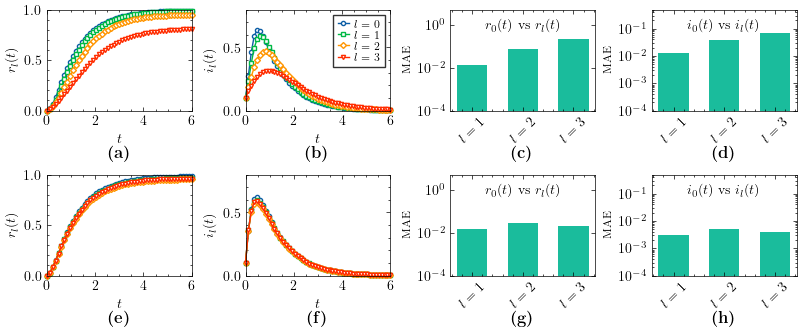

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(8, 3.3), constrained_layout=True)
ax = axs[0, 0]
ax.plot(t, rt_ER[0, :], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(t, rt_ER[1, :], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(t, rt_ER[2, :], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(t, rt_ER[3, :], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))
ax.set_xlim(tmin, tmax)
ax.set_ylim(0.0, 1.0)
ax.set_title(r"\textbf{(a)}", loc='center', y=-0.55, fontsize=12)
ax.set_xlabel("$t$")
ax.set_ylabel("$r_l(t)$")


ax = axs[0, 1]
ax.plot(t, it_ER[0, :], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(t, it_ER[1, :], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(t, it_ER[2, :], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(t, it_ER[3, :], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))
ax.set_xlim(tmin, tmax)
ax.set_ylim(0.0, 0.8)
ax.set_title(r"\textbf{(b)}", loc='center', y=-0.55, fontsize=12)
ax.set_xlabel("$t$")
ax.set_ylabel("$i_l(t)$")
ax.legend(loc=1, edgecolor = "black", ncol = 1, columnspacing=0.75, handletextpad=0.5, labelspacing=0.1, handlelength=1.0, fontsize=8, frameon=True, fancybox=False)


ax = axs[0, 2]
bars = ax.bar(x, R_MAE_list_ER, color='#1abc9c', width=0.6)
ax.set_xticks(x)  # 设置刻度位置
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10)  # 设置刻度标签
ax.set_ylabel('MAE', fontsize=8)
# ax_inset.tick_params(axis='x', rotation=45, labelsize=6)  # 旋转x轴标签并缩小字体
ax.set_ylim(1e-4, 5)  # 设置y轴范围，留出顶部空间
ax.set_yscale("log")
ax.set_title(r"\textbf{(c)}", loc='center', y=-0.55, fontsize=12)
ax.text(0.5, 0.8, '$r_0(t)$ vs $r_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)


ax = axs[0, 3]
bars = ax.bar(x, I_MAE_list_ER, color='#1abc9c', width=0.6)
ax.set_xticks(x) 
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10)
ax.set_ylabel('MAE', fontsize=8)
ax.set_ylim(1e-4, 5e-1)
ax.set_yscale("log")
ax.set_title(r"\textbf{(d)}", loc='center', y=-0.55, fontsize=12)
ax.text(0.5, 0.8, '$i_0(t)$ vs $i_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)


ax = axs[1, 0]
ax.plot(t, rt_BA[0, :], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(t, rt_BA[1, :], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(t, rt_BA[2, :], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(t, rt_BA[3, :], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))

ax.set_xlim(tmin, tmax)
ax.set_ylim(0.0, 1.0)
ax.set_title(r"\textbf{(e)}", loc='center', y=-0.55, fontsize=12)
ax.set_xlabel("$t$")
ax.set_ylabel("$r_l(t)$")


ax = axs[1, 1]
ax.plot(t, it_BA[0, :], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(t, it_BA[1, :], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(t, it_BA[2, :], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(t, it_BA[3, :], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))

ax.set_xlim(tmin, tmax)
ax.set_ylim(0.0, 0.8)
ax.set_title(r"\textbf{(f)}", loc='center', y=-0.55, fontsize=12)
ax.set_xlabel("$t$")
ax.set_ylabel("$i_l(t)$")
# ax.legend(loc=1, edgecolor = "black", ncol = 1, columnspacing=0.75, handletextpad=0.5, labelspacing=0.1, handlelength=1.0, fontsize=8, frameon=True, fancybox=False)


ax = axs[1, 2]
bars = ax.bar(x, R_MAE_list_BA, color='#1abc9c', width=0.6)
ax.set_xticks(x) 
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10)
ax.set_ylabel('MAE', fontsize=8)
ax.set_ylim(1e-4, 5)  
ax.set_yscale("log")
ax.set_title(r"\textbf{(g)}", loc='center', y=-0.55, fontsize=12)
ax.text(0.5, 0.8, '$r_0(t)$ vs $r_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)


ax = axs[1, 3]
bars = ax.bar(x, I_MAE_list_BA, color='#1abc9c', width=0.6)
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10)
ax.set_ylabel('MAE', fontsize=8)
ax.set_ylim(1e-4, 5e-1)
ax.set_yscale("log")
ax.set_title(r"\textbf{(h)}", loc='center', y=-0.55, fontsize=12)
ax.text(0.5, 0.8, '$i_0(t)$ vs $i_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)


plt.savefig("Fig4_SIR_Rt_It_ER_BA_NRDC_plus.pdf")
plt.show()